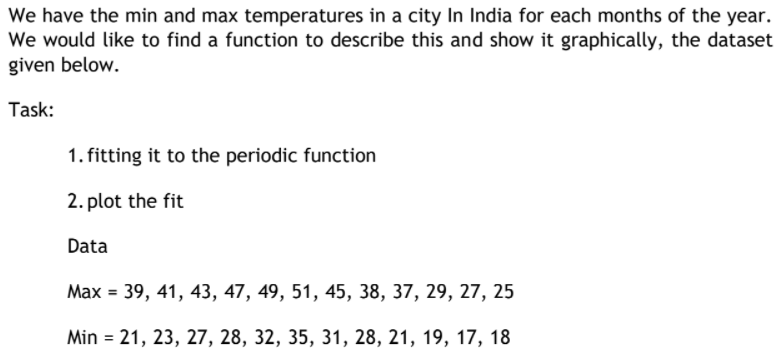

In [4]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import pandas as pd

In [5]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [8]:
# fitting to the periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

months = np.arange(12)
res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min_temp, [-40, 20, 0])

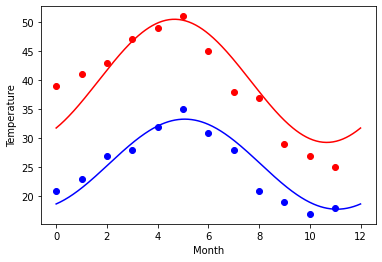

In [10]:
# plot the fit
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

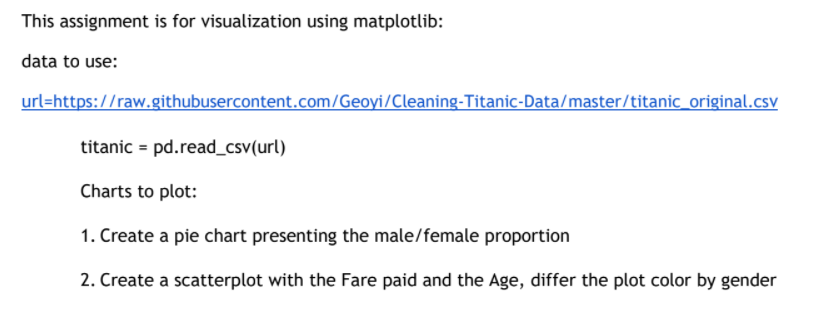

In [11]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

titanic = pd.read_csv(url)
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [12]:
sex = titanic['sex']
sex

0       female
1         male
2       female
3         male
4       female
         ...  
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: object

In [13]:
sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

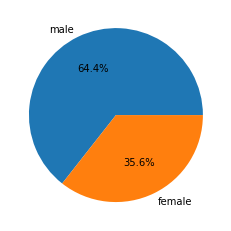

In [17]:
plt.pie(sex.value_counts(),labels=['male','female'],autopct='%.1f%%');

In [18]:
data = titanic[['fare','age','sex']]
data

,fare,age,sex
0,211.3375,29.0000,female
1,151.5500,0.9167,male
2,151.5500,2.0000,female
3,151.5500,30.0000,male
4,151.5500,25.0000,female
...,...,...,...
1305,14.4542,NaN,female
1306,7.2250,26.5000,male
1307,7.2250,27.0000,male
1308,7.8750,29.0000,male


In [31]:
male = data[data['sex']=='male']
female = data[data['sex']=='female']

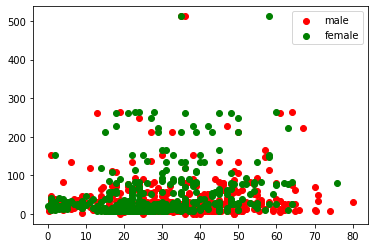

In [38]:
plt.figure()
plt.scatter(male['age'],male['fare'],color='red',label='male')
plt.scatter(female['age'],female['fare'],color='green',label='female')
plt.legend()